# Leiden analysis 

In [1]:
import numpy as np
import pandas as pd
import hicstraw
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from matplotlib import rcParams
import os
import re

import pickle
import pcst_fast


import igraph as ig
# print(igraph.__version__)
from igraph import *
import matplotlib.pyplot as plt

from itertools import permutations,combinations,product,repeat
from functools import reduce 
from collections import Counter
import operator
from itertools import combinations_with_replacement 
import string
import sys
import random
import networkx as nx

import math
import matplotlib

# pip install leidenalg
import leidenalg

In [ ]:
os.getcwd() # infact, we are here. 
os.chdir("./")
os.getcwd()

## load the data needed

In [4]:
PATH = "./"


## DEG_df_filter

In [5]:
DEG_df_filter = pd.read_csv(PATH +"DEG_df_filter_CV_TPM.csv")
DEG_df_filter.drop(columns = [DEG_df_filter.columns[0]],inplace=True)
DEG_df_filter.shape


(2284, 16)

In [6]:
DEG_df_filter.columns

Index(['Gene', 'Ctrl_1_TPM', 'Ctrl_2_TPM', 'Ctrl_3_TPM', 'RA4h_1_TPM',
       'RA4h_2_TPM', 'RA4h_3_TPM', 'RA2d_1_TPM', 'RA2d_2_TPM', 'RA2d_3_TPM',
       'RA4d_1_TPM', 'RA4d_2_TPM', 'RA4d_3_TPM', 'CV', 'clusters', 'TPM_max'],
      dtype='object')

In [7]:
DEG_df_filter.head()


,Gene,Ctrl_1_TPM,Ctrl_2_TPM,Ctrl_3_TPM,RA4h_1_TPM,RA4h_2_TPM,RA4h_3_TPM,RA2d_1_TPM,RA2d_2_TPM,RA2d_3_TPM,RA4d_1_TPM,RA4d_2_TPM,RA4d_3_TPM,CV,clusters,TPM_max
0,MZB1,109.093649,167.596810,111.056664,49.472022,66.704074,82.524580,5.644391,5.822183,5.293589,1.265019,0.575732,0.727840,1.126088,Down,167.596810
1,MYO7A,3.235378,6.196173,4.630086,2.196421,2.217293,1.955980,0.192839,0.260673,0.132981,0.027012,0.092202,0.025903,1.168018,Down,6.196173
2,S1PR3,7.995836,5.223554,9.211233,9.923974,8.292625,6.252422,0.936135,0.849521,0.469494,0.047683,0.379776,0.045725,0.975769,Down,9.923974
3,SPNS3,181.501032,370.968160,240.683500,265.133427,282.954018,363.844201,16.373444,15.671567,14.283858,4.421218,4.778911,3.921671,1.030433,Down,370.968160
4,ASS1,71.131072,79.496475,81.017681,101.270698,107.352596,117.365582,5.961185,5.295028,5.992021,1.585107,1.417055,1.411437,1.000078,Down,117.365582


## DAR_df_filter

In [8]:
DAR_df_filter = pd.read_csv(PATH +"DAR_df_filter_CV_TPM.csv")
DAR_df_filter.drop(columns = [DAR_df_filter.columns[0]],inplace=True)
DAR_df_filter.shape

(9571, 17)

In [9]:
DAR_df_filter.head()

,chr,start,end,idx,HL60_Ctrl_1,HL60_Ctrl_2,HL60_4h_1,HL60_4h_2,HL60_2d_1,HL60_2d_2,HL60_4d_1,HL60_4d_2,clusters,Name,CV,Tfs,TPM_max
0,chr1,100151198,100151563,2071,24.442941,17.631306,14.938476,17.039104,13.438951,7.802406,2.246312,7.905755,RA0h,RA0h_1,0.529532,NaN,24.442941
1,chr1,102462597,102462869,2136,18.222372,21.839684,7.016141,5.379994,8.323332,10.470140,5.023921,5.304413,RA0h,RA0h_3,0.628527,REST,21.839684
2,chr1,102666192,102666446,2140,19.513721,3.897896,6.440012,4.320940,4.456587,3.203462,1.075989,2.840158,RA0h,RA0h_4,1.010723,NaN,19.513721
3,chr1,104908124,104908770,2173,12.276124,6.896742,8.018447,6.229467,6.425028,4.408480,4.230670,1.116718,RA0h,RA0h_5,0.523300,"BHLHE41,FOXL1,GATA5,HEY2",12.276124
4,chr1,104961120,104961457,2174,11.766137,7.344701,0.808983,1.085577,0.000000,0.000000,3.243932,4.281306,RA0h,RA0h_6,1.167348,NaN,11.766137


## Links_info_with_score

In [11]:
# import pickle
file_name = PATH+"Links_info_with_score.pkl"
open_file = open(file_name, "rb")
Links_info_with_score = pickle.load(open_file)

open_file.close()

# data manipulate 


# 1.  node name ---> number 


In [16]:
DEG2num = [( DEG_df_filter["Gene"][i],i ) for i in range(DEG_df_filter.shape[0])]
DEG2num_dict = dict(DEG2num)
# DEG2num_dict.values() 0-2283
len(DEG2num_dict)

2284

In [18]:
DAR2num = [( DAR_df_filter["Name"][i],i + DEG_df_filter.shape[0] ) for i in range(DAR_df_filter.shape[0])]
DAR2num_dict = dict(DAR2num)
len(DAR2num_dict)

9571

# merge node dict

https://favtutor.com/blogs/merge-dictionaries-python

In [21]:
Node_dict = {**DEG2num_dict,**DAR2num_dict}
len(DEG2num_dict) + len(DAR2num_dict)

11855

In [22]:
len(Node_dict)

11855

# 2.  edges ---> number 


In [23]:
Links_info_with_score.head()

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score
0,ABAT,A1BG,0.91,chr16,8768444,chr19,58864865,NaN
1,ABCA1,A1BG,0.92,chr9,107690527,chr19,58864865,NaN
2,ABCA7,A1BG,0.96,chr19,1040102,chr19,58864865,NaN
3,ABCB1,A1BG,0.90,chr7,87342639,chr19,58864865,NaN
4,ABCB10,A1BG,-0.83,chr1,229694442,chr19,58864865,NaN


In [24]:
From_Num = [ Node_dict[n] for n in Links_info_with_score["From"]] 
To_Num = [ Node_dict[n] for n in Links_info_with_score["To"]] 

In [25]:
Edges_num  = np.array(list(zip(From_Num, To_Num) ))


In [26]:
Edges_num.shape

(54532186, 2)

# 3. prizes---> : 1D float64 array


In [30]:
Node_prize  = pd.concat([DEG_df_filter["CV"], DAR_df_filter["CV"]] ,axis = 0 )
Node_prize

0       1.126088
1       1.168018
2       0.975769
3       1.030433
4       1.000078
          ...   
9566    1.502242
9567    1.313407
9568    0.919763
9569    0.837887
9570    0.531774
Name: CV, Length: 11855, dtype: float64

In [32]:
Node_prize.reset_index(inplace=True, drop=True)

Node_prize

0        1.126088
1        1.168018
2        0.975769
3        1.030433
4        1.000078
           ...   
11850    1.502242
11851    1.313407
11852    0.919763
11853    0.837887
11854    0.531774
Name: CV, Length: 11855, dtype: float64

In [33]:
Node_prize = Node_prize.to_numpy()
type(Node_prize)

numpy.ndarray

# 4. costs---> : 1D float64 array



In [38]:
Links_info_with_score.loc[Links_info_with_score["score"].isna() , 'score'] = 0

In [39]:
Links_info_with_score.loc[Links_info_with_score['score'] > 0 , 'score'] = 1

Links_info_with_score[Links_info_with_score.score > 0]

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score
13961,RA4d_2666,ABAT,0.92,chr16,8632231,chr16,8768444,1.0
19278,RA4h_6055,ABCA1,-0.96,chr9,107535366,chr9,107690527,1.0
21914,ELANE,ABCA7,-0.86,chr19,852291,chr19,1040102,1.0
22410,LPPR3,ABCA7,-0.91,chr19,821952,chr19,1040102,1.0
23316,WDR18,ABCA7,-0.79,chr19,984328,chr19,1040102,1.0
...,...,...,...,...,...,...,...,...
54463462,DNASE1L1,RA4d_7117,0.87,chrX,153640428,chrX,153665383,1.0
54463638,GDI1,RA4d_7117,1.00,chrX,153665259,chrX,153665383,1.0
54469124,CXorf23,RA4d_7131,0.95,chrX,19988382,chrX,20055988,1.0
54470656,RA0h_2100,RA4d_7131,-0.95,chrX,19776855,chrX,20055988,1.0


In [40]:
Links_info_with_score["score"].min()

0.0

In [41]:
Links_info_with_score["score"].max()

1.0

In [42]:
Links_info_with_score["Corr"] 

0           0.91
1           0.92
2           0.96
3           0.90
4          -0.83
            ... 
54532181    0.83
54532182    0.91
54532183    0.96
54532184    0.97
54532185    0.94
Name: Corr, Length: 54532186, dtype: float64

In [43]:
#. +2 to make them all positive values
Edge_costs = -(Links_info_with_score["Corr"].abs() + Links_info_with_score["score"])+2

In [47]:
Edge_costs = Edge_costs.to_numpy(dtype=np.float64)

# Leiden algorithm

## 1. need igraph 

In [54]:

graph_df = Links_info_with_score

graph_df.shape

(54532186, 8)

In [55]:
graph_df.head()

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score
0,ABAT,A1BG,0.91,chr16,8768444,chr19,58864865,0.0
1,ABCA1,A1BG,0.92,chr9,107690527,chr19,58864865,0.0
2,ABCA7,A1BG,0.96,chr19,1040102,chr19,58864865,0.0
3,ABCB1,A1BG,0.90,chr7,87342639,chr19,58864865,0.0
4,ABCB10,A1BG,-0.83,chr1,229694442,chr19,58864865,0.0


In [60]:
G = ig.Graph(Edges_num)


In [64]:

summary(G)

IGRAPH U--- 11855 54532186 -- 


In [65]:
Links_info_with_score["From_num"] = From_Num
Links_info_with_score["To_num"] = To_Num
Links_info_with_score.head()

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score,From_num,To_num
0,ABAT,A1BG,0.91,chr16,8768444,chr19,58864865,0.0,962,1140
1,ABCA1,A1BG,0.92,chr9,107690527,chr19,58864865,0.0,647,1140
2,ABCA7,A1BG,0.96,chr19,1040102,chr19,58864865,0.0,832,1140
3,ABCB1,A1BG,0.90,chr7,87342639,chr19,58864865,0.0,2229,1140
4,ABCB10,A1BG,-0.83,chr1,229694442,chr19,58864865,0.0,484,1140


## vertex

In [70]:
## vertex name
G.vs["name"] = list(DEG_df_filter["Gene"])+ list(DAR_df_filter["Name"])

In [71]:
len(G.vs["name"])

11855

In [72]:
# vertex weight(prize)

G.vs["Prize"] = list(Node_prize)

In [73]:
len(G.vs["Prize"])

11855

In [74]:
G.vs.attributes()

['name', 'Prize']

## edges

In [ ]:

G.es["Weight"] = list(Links_info_with_score["Corr"].abs() + Links_info_with_score["score"])

In [77]:
len(G.es["Weight"])

54532186

In [78]:
G.es[0].attributes()

{'Weight': 0.91}

## 2. Leiden 

https://github.com/vtraag/leidenalg

# number of partition depends on the max_comm_size

In [80]:
partition = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition,
                                     weights = G.es["Weight"],
                                     max_comm_size= 1000,
                                    seed = 42);


In [88]:
summary(partition)

Clustering with 11855 elements and 15 clusters


# take each partition out and draw the graph individually

In [84]:
[print(len(p)) for p in partition ]

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
502
197
151
5


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## use the 1st partition for testing

## 1.---- take the sub-graph out from the graph_df

In [86]:
graph_df.shape

(54532186, 10)

In [87]:
graph_df_partition = graph_df[(graph_df.From_num.isin(partition[0])) & (graph_df.To_num.isin(partition[0]))]
graph_df_partition.shape

(789360, 10)

In [88]:
graph_df_partition.reset_index(inplace=True, drop=True)

In [89]:
graph_df_partition.head()

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score,From_num,To_num
0,ANKRD9,ABCC4,-0.83,chr14,102976128,chr13,95953700,0.0,1834,133
1,ANO8,ABCC4,-0.91,chr19,17445638,chr13,95953700,0.0,1065,133
2,BCAT1,ABCC4,1.00,chr12,25102393,chr13,95953700,0.0,32,133
3,BOLA3,ABCC4,1.00,chr2,74375039,chr13,95953700,0.0,147,133
4,C1QBP,ABCC4,0.99,chr17,5342471,chr13,95953700,0.0,292,133


## 2. rename: create name dict for igraph ( 0-->n )



In [90]:

partition_node1 = sorted([k for k in Node_dict if Node_dict[k] in (partition[0])])
len(partition_node1)


1000

In [91]:
partition_node2 = sorted(list(set(pd.concat([graph_df_partition.From, graph_df_partition.To]))))
len(partition_node2)

1000

In [92]:
partition_node1 == partition_node2

True

In [93]:
partition_node = partition_node2
partition_node[0:10]

['ABCC4',
 'ANKRD9',
 'ANO8',
 'BCAT1',
 'BOLA3',
 'BRICD5',
 'C1QBP',
 'CCDC138',
 'CD52',
 'CERS6']

In [96]:
partition_node2num = [ ( partition_node[i], i ) for i in range(len(partition_node))]

partition_node2num_dict = dict(partition_node2num)

# partition_node2num_dict.values() 0-2283
len(partition_node2num_dict)

1000

In [97]:
## update the From_num To_num
graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]] 

graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]] 
graph_df_partition.head()

/tmp/ipykernel_49378/317959012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/317959012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score,From_num,To_num
0,ANKRD9,ABCC4,-0.83,chr14,102976128,chr13,95953700,0.0,1,0
1,ANO8,ABCC4,-0.91,chr19,17445638,chr13,95953700,0.0,2,0
2,BCAT1,ABCC4,1.00,chr12,25102393,chr13,95953700,0.0,3,0
3,BOLA3,ABCC4,1.00,chr2,74375039,chr13,95953700,0.0,4,0
4,C1QBP,ABCC4,0.99,chr17,5342471,chr13,95953700,0.0,6,0


## 3. set some features for ploting

node type (shape): DEG, DAR 

node changes:

    -- DEG node changes direction (color): Up(red), down(blue) 

    -- DAR node changes direction (color): 0h, 4h, 2d, 4d (gradual chnage color)

    -- node changes size: CV 

edge width: weight 


## Vertex_type

In [99]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
even_or_odd = ["EVEN" if n % 2 == 0 else "ODD" for n in numbers]
print(even_or_odd)

['ODD', 'EVEN', 'ODD', 'EVEN', 'ODD', 'EVEN', 'ODD', 'EVEN', 'ODD', 'EVEN']


In [100]:
Vertex = list(partition_node2num_dict.keys())

Vertex_type = ["DEG" if V in list(DEG2num_dict.keys()) else "DAR" for V in Vertex ]
len(Vertex_type)

1000

## Vertex change direction

In [102]:
DEG_df_filter.head()

,Gene,Ctrl_1_TPM,Ctrl_2_TPM,Ctrl_3_TPM,RA4h_1_TPM,RA4h_2_TPM,RA4h_3_TPM,RA2d_1_TPM,RA2d_2_TPM,RA2d_3_TPM,RA4d_1_TPM,RA4d_2_TPM,RA4d_3_TPM,CV,clusters,TPM_max
0,MZB1,109.093649,167.596810,111.056664,49.472022,66.704074,82.524580,5.644391,5.822183,5.293589,1.265019,0.575732,0.727840,1.126088,Down,167.596810
1,MYO7A,3.235378,6.196173,4.630086,2.196421,2.217293,1.955980,0.192839,0.260673,0.132981,0.027012,0.092202,0.025903,1.168018,Down,6.196173
2,S1PR3,7.995836,5.223554,9.211233,9.923974,8.292625,6.252422,0.936135,0.849521,0.469494,0.047683,0.379776,0.045725,0.975769,Down,9.923974
3,SPNS3,181.501032,370.968160,240.683500,265.133427,282.954018,363.844201,16.373444,15.671567,14.283858,4.421218,4.778911,3.921671,1.030433,Down,370.968160
4,ASS1,71.131072,79.496475,81.017681,101.270698,107.352596,117.365582,5.961185,5.295028,5.992021,1.585107,1.417055,1.411437,1.000078,Down,117.365582


In [103]:
DAR_df_filter.head()

,chr,start,end,idx,HL60_Ctrl_1,HL60_Ctrl_2,HL60_4h_1,HL60_4h_2,HL60_2d_1,HL60_2d_2,HL60_4d_1,HL60_4d_2,clusters,Name,CV,Tfs,TPM_max
0,chr1,100151198,100151563,2071,24.442941,17.631306,14.938476,17.039104,13.438951,7.802406,2.246312,7.905755,RA0h,RA0h_1,0.529532,NaN,24.442941
1,chr1,102462597,102462869,2136,18.222372,21.839684,7.016141,5.379994,8.323332,10.470140,5.023921,5.304413,RA0h,RA0h_3,0.628527,REST,21.839684
2,chr1,102666192,102666446,2140,19.513721,3.897896,6.440012,4.320940,4.456587,3.203462,1.075989,2.840158,RA0h,RA0h_4,1.010723,NaN,19.513721
3,chr1,104908124,104908770,2173,12.276124,6.896742,8.018447,6.229467,6.425028,4.408480,4.230670,1.116718,RA0h,RA0h_5,0.523300,"BHLHE41,FOXL1,GATA5,HEY2",12.276124
4,chr1,104961120,104961457,2174,11.766137,7.344701,0.808983,1.085577,0.000000,0.000000,3.243932,4.281306,RA0h,RA0h_6,1.167348,NaN,11.766137


In [104]:
Vertex_DEG_change_direction = DEG_df_filter[DEG_df_filter.Gene.isin(Vertex)]

print(Vertex_DEG_change_direction.shape)

Vertex_DEG_change_direction_dict = dict(zip(Vertex_DEG_change_direction.Gene, Vertex_DEG_change_direction.clusters))

(55, 16)


In [105]:
Vertex_DAR_change_direction = DAR_df_filter[DAR_df_filter.Name.isin(Vertex)]

print(Vertex_DAR_change_direction.shape)

Vertex_DAR_change_direction_dict = dict(zip(Vertex_DAR_change_direction.Name, Vertex_DAR_change_direction.clusters))

(945, 17)


In [106]:
Vertex_change_direction_dict  = {**Vertex_DEG_change_direction_dict,**Vertex_DAR_change_direction_dict}
len(Vertex_DEG_change_direction_dict) + len(Vertex_DAR_change_direction)

1000

In [107]:
Vertex_change_direction = [ Vertex_change_direction_dict[v]  for v in Vertex ]
Vertex_change_direction[1:10]

['Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up']

## Vertex change size

In [108]:
Vertex_DEG_change_size = DEG_df_filter[DEG_df_filter.Gene.isin(Vertex)]

print(Vertex_DEG_change_size.shape)

Vertex_DEG_change_size_dict = dict(zip(Vertex_DEG_change_size.Gene, Vertex_DEG_change_size.CV))

Vertex_DAR_change_size = DAR_df_filter[DAR_df_filter.Name.isin(Vertex)]

print(Vertex_DAR_change_size.shape)

Vertex_DAR_change_size_dict = dict(zip(Vertex_DAR_change_size.Name, Vertex_DAR_change_size.CV))

(55, 16)
(945, 17)


In [109]:
Vertex_change_size_dict  = {**Vertex_DEG_change_size_dict,**Vertex_DAR_change_size_dict}
len(Vertex_DEG_change_size_dict) + len(Vertex_DAR_change_size)

1000

In [110]:
Vertex_change_size = [ Vertex_change_size_dict[v]  for v in Vertex ]
Vertex_change_size = [ float('%.2f' % elem) for elem in Vertex_change_size] # keeo only two decimal
Vertex_change_size[1:10]

[0.61, 0.69, 0.92, 0.71, 0.76, 0.58, 0.55, 0.61, 0.61]

## edge width: weight 

already save in edges weight

G.es["Weight"] = list(Links_info_with_score["Corr"].abs() + Links_info_with_score["score"])


# plot 

In [111]:
graph_df_partition.head()

,From,To,Corr,From_chr,From_pos,To_chr,To_pos,score,From_num,To_num
0,ANKRD9,ABCC4,-0.83,chr14,102976128,chr13,95953700,0.0,1,0
1,ANO8,ABCC4,-0.91,chr19,17445638,chr13,95953700,0.0,2,0
2,BCAT1,ABCC4,1.00,chr12,25102393,chr13,95953700,0.0,3,0
3,BOLA3,ABCC4,1.00,chr2,74375039,chr13,95953700,0.0,4,0
4,C1QBP,ABCC4,0.99,chr17,5342471,chr13,95953700,0.0,6,0


In [112]:
g = ig.Graph(edges=list(zip(graph_df_partition.From_num,graph_df_partition.To_num)))

In [117]:
visual_style = {}

In [118]:
visual_style["vertex_size"] = [i * 10 for i in Vertex_change_size] 

In [121]:
shape_dict = {"DEG": "circle", "DAR": "rectangle"}

visual_style["vertex_shape"] =   [shape_dict[Type] for Type in Vertex_type ]

In [122]:
set(Vertex_change_direction)

{'Down', 'RA0h', 'RA2d', 'RA4d', 'RA4h', 'Up'}

In [123]:
color_dict = {"Up": "red", "Down": "blue", "RA0h":"cyan","RA4h":"cyan2","RA2d":"cyan4","RA4d":"DarkCyan"}
visual_style["vertex_color"] =   [color_dict[Type] for Type in Vertex_change_direction ]

In [124]:
# visual_style["vertex_label"] = g.vs["name"]

# the vertex number changed, so ned to calculated again based on graph_df_partition
visual_style["edge_width"] =  list(graph_df_partition["Corr"].abs() + graph_df_partition["score"])
# visual_style["edge_width"] = [ n*0.1 for n in visual_style["edge_width"]]
visual_style["edge_width"] = [ n*0.1 if n<1 else n for n in visual_style["edge_width"]]
visual_style["edge_color"] = [ "grey" if n<1 else "black" for n in visual_style["edge_width"]]

# Vertex_type = ["DEG" if V in list(DEG2num_dict.keys()) else "DAR" for V in Vertex ]

In [125]:
max(visual_style["edge_width"])


2.0

In [126]:

g.vs["name"] = Vertex

# g.vs["label"] = ['' if n.startswith("RA") else n for n in g.vs["name"]] ## there is a potential to lose some genes 
g.vs["label"] = ['' if n in list(DAR2num_dict.keys())  else n for n in g.vs["name"]]
visual_style["vertex_label_size"] = 5
visual_style["vertex_label_color"] = "lime"
visual_style["vertex_label_dist"] = 1

In [128]:

# layout_drl  The Distributed Recursive Layout algorithm for large graphs
layout = g.layout("drl")

visual_style["layout"] = layout

# extract other information behind the cluster

## DEG_in_partition (perform GO ananlysis)

In [130]:
DEG_in_partition = [ n  for n in g.vs["name"] if n in list(DEG2num_dict.keys()) ]
len(DEG_in_partition)

55

In [132]:
import os
import re
import collections
import itertools

In [133]:
species = 'Human'

from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader 
obodag = GODag("/home/qchen/PhD/IR_zhouhaoPaper/Zhouhao_script_Qing_modify/GO/go-basic.obo")

if species == 'Mouse':
    geneid2gos = Gene2GoReader("/home/qchen/PhD/IR_zhouhaoPaper/Zhouhao_script_Qing_modify/GO/gene2go", taxids=[10090])
    from goatools.test_data.genes_NCBI_10090_ProteinCoding import GENEID2NT
    
elif species == 'Human':
    geneid2gos = Gene2GoReader("/home/qchen/PhD/IR_zhouhaoPaper/Zhouhao_script_Qing_modify/GO/gene2go", taxids=[9606])
    from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT


/home/qchen/PhD/IR_zhouhaoPaper/Zhouhao_script_Qing_modify/GO/go-basic.obo: fmt(1.2) rel(2020-12-08) 47,295 Terms
HMS:0:00:08.501943 336,409 annotations, 20,674 genes, 18,457 GOs, 1 taxids READ: /home/qchen/PhD/IR_zhouhaoPaper/Zhouhao_script_Qing_modify/GO/gene2go 


In [134]:
from goatools.go_enrichment import GOEnrichmentStudy

goeaobj = GOEnrichmentStudy(
        GENEID2NT.keys(), # List of mouse protein-coding genes

        geneid2gos.get_id2gos_nss(),
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest cor

all_genes_symbol2id = dict([(value.Symbol, key) for (key, value) in GENEID2NT.items()])


Load  Ontology Enrichment Analysis ...
 89% 18,654 of 20,913 population items found in association


In [135]:
gene_list = DEG_in_partition
len((gene_list ))

55

In [136]:
print((gene_list),sep = ",")

['ABCC4', 'ANKRD9', 'ANO8', 'BCAT1', 'BOLA3', 'BRICD5', 'C1QBP', 'CCDC138', 'CD52', 'CERS6', 'CHAC2', 'CLDND2', 'COQ3', 'DDX18', 'DLAT', 'DUXAP8', 'FADS2', 'FIRRE', 'FKBP5', 'FLJ20021', 'FOXO6', 'HMGN5', 'HOOK2', 'IARS', 'IFT57', 'KLC2', 'LMAN1', 'LRP8', 'MANF', 'METRNL', 'MYBPH', 'NDRG1', 'NLN', 'NOC3L', 'NUBPL', 'NUP155', 'OLIG1', 'PDIA6', 'PEMT', 'PNPT1', 'RCC1', 'RFC3', 'S100A12', 'SCAMP1', 'SEC11C', 'SLC25A29', 'SLC9B2', 'SNORD101', 'SNORD46', 'SRPX', 'TBX6', 'UCHL5', 'UTP20', 'XRCC2', 'XYLB']


In [137]:

    # 'p_' means "pvalue". 'fdr_bh' is the multipletest method we are currently using.
    geneids_study = [value for (key, value) in all_genes_symbol2id.items() if key in gene_list]
    goea_results_all = goeaobj.run_study(geneids_study)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]
    
    
    if len(goea_results_sig) > 0:  
        plt.figure(figsize=(12,8))
        sns.barplot([-np.log10(item.p_fdr_bh) for item in goea_results_sig[:100]], [item.name for item in goea_results_sig[:100]])
        plt.xlabel('-log10(p-value)')
        plt.title('partition')
    



Runing  Ontology Analysis: current study set of 50 IDs.
 98%     49 of     50 study items found in association
100%     50 of     50 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     560 terms are associated with     49 of     50 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


## DAR_in_partition (extract the TFs )

In [138]:
DAR_in_partition = [n for n in g.vs["name"]  if n in list(DAR2num_dict.keys()) ]
len(DAR_in_partition)

945

In [139]:
DAR_df_filter.head()

,chr,start,end,idx,HL60_Ctrl_1,HL60_Ctrl_2,HL60_4h_1,HL60_4h_2,HL60_2d_1,HL60_2d_2,HL60_4d_1,HL60_4d_2,clusters,Name,CV,Tfs,TPM_max
0,chr1,100151198,100151563,2071,24.442941,17.631306,14.938476,17.039104,13.438951,7.802406,2.246312,7.905755,RA0h,RA0h_1,0.529532,NaN,24.442941
1,chr1,102462597,102462869,2136,18.222372,21.839684,7.016141,5.379994,8.323332,10.470140,5.023921,5.304413,RA0h,RA0h_3,0.628527,REST,21.839684
2,chr1,102666192,102666446,2140,19.513721,3.897896,6.440012,4.320940,4.456587,3.203462,1.075989,2.840158,RA0h,RA0h_4,1.010723,NaN,19.513721
3,chr1,104908124,104908770,2173,12.276124,6.896742,8.018447,6.229467,6.425028,4.408480,4.230670,1.116718,RA0h,RA0h_5,0.523300,"BHLHE41,FOXL1,GATA5,HEY2",12.276124
4,chr1,104961120,104961457,2174,11.766137,7.344701,0.808983,1.085577,0.000000,0.000000,3.243932,4.281306,RA0h,RA0h_6,1.167348,NaN,11.766137


## select rows   (isin, in @)

## the oposite ~ . not in

In [140]:
# DAR_df_filter[~DAR_df_filter['Name'].isin(DAR_in_partition)].shape
DAR_df_filter[DAR_df_filter['Name'].isin(DAR_in_partition)].shape


(945, 17)

In [141]:
# DAR_df_filter.query("Name not in @DAR_in_partition").shape
DAR_df_filter.query("Name in @DAR_in_partition").shape

(945, 17)

In [ ]:
### save the DAR in the partition 

In [143]:
DAR_df_filter.query("Name in @DAR_in_partition").head()

,chr,start,end,idx,HL60_Ctrl_1,HL60_Ctrl_2,HL60_4h_1,HL60_4h_2,HL60_2d_1,HL60_2d_2,HL60_4d_1,HL60_4d_2,clusters,Name,CV,Tfs,TPM_max
214,chr12,74345741,74345946,11749,16.924584,7.244383,2.659777,0.000000,11.043641,0.000000,7.999062,14.076100,RA0h,RA0h_335,0.845318,MZF1,16.924584
328,chr13,83455724,83455992,14985,16.644913,3.694275,5.086328,1.365073,7.039634,3.036117,13.257153,5.383583,RA0h,RA0h_499,0.764226,MGA,16.644913
514,chr18,72715905,72716082,23696,14.001371,11.187183,1.540267,2.066890,4.263553,0.000000,13.896676,8.151414,RA0h,RA0h_772,0.824824,NaN,14.001371
647,chr2,34421108,34421277,26066,14.664158,5.858377,3.226357,0.000000,6.698066,2.407336,8.085837,10.671599,RA0h,RA0h_962,0.733422,NaN,14.664158
1014,chr5,140554491,140554872,43842,16.911892,7.795793,4.293341,4.801044,4.951764,7.474745,13.629199,9.467193,RA0h,RA0h_1496,0.522125,NaN,16.911892


In [147]:
path = os.path.join(os.getcwd(), )
path
os.mkdir(path)

In [154]:
i=1
DAR_df_filter.query("Name in @DAR_in_partition").to_csv(os.getcwd()+'/DAR_in_partition/partition_'+str(i)+'.csv') 
DAR_df_filter.query("Name in @DAR_in_partition")[['chr','start','end']].to_csv(os.getcwd()+'/DAR_in_partition/partition_'+str(i)+'.bed', index=False, header = True,sep = "\t") 


In [160]:
TFs_in_partition_df = DAR_df_filter.query("Name in @DAR_in_partition")

In [161]:
TFs_in_partition = TFs_in_partition_df["Tfs"]

In [162]:
## combine all the Tfs in the series together
TFs_in_partition.str.cat(sep=',')

'MZF1,MGA,MZF1,UBP1,ZEB1,TBX4,TBX5,ZEB1,ZEB1,ATOH1,MZF1,SOX6,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXL1,FOXO1,FOXO3,FOXP1,FOXP3,ZEB1,UBP1,UBP1,FOXC2,VENTX,RORB,HOXA4,MZF1,UBP1,MGA,ZEB1,FOXD3,NR2F2,SPI1,LHX9,SHOX,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,MGA,SOX6,DLX2,HOXD1,GATA5,DLX2,JDP2,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,HOXA4,PAX4,NR2F2,ESRRG,LHX6,UBP1,UBP1,HOXA4,NR2F2,FOXD3,MGA,UBP1,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,MGA,VENTX,FOXL1,HOXA4,UBP1,UBP1,MAF,PBX4,OTX1,OTX2,STAT6,GATA3,NANOG,SOX4,HOXA4,STAT6,HOXA1,PDX1,VENTX,FOXL1,MAF,UBP1,MGA,TBX4,TBX5,NANOG,KLF1,UBP1,PDX1,DLX2,UBP1,HIVEP3,ZEB1,GATA3,MGA,ZEB1,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,STAT6,HOXA4,JDP2,ZNF14,RUNX2,MGA,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,NANOG,PBX4,UBP1,NR2E1,NR2F2,GATA3,ZEB1,UBP1,MGA,UBP1,MAF,MGA,ZEB1,UBP1,CEBPA,NR2F2,FOXD3,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXO1,FOXO3,FOXP1,FOXP3,IRF1,HOXA4,MGA,MGA,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXO1,FOXO3,FOXP1,FOXP3,MGA,FOXL1,MGA,PBX4,SOX4

In [163]:
TFs_in_partition = TFs_in_partition.str.cat(sep=',')
TFs_in_partition

'MZF1,MGA,MZF1,UBP1,ZEB1,TBX4,TBX5,ZEB1,ZEB1,ATOH1,MZF1,SOX6,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXL1,FOXO1,FOXO3,FOXP1,FOXP3,ZEB1,UBP1,UBP1,FOXC2,VENTX,RORB,HOXA4,MZF1,UBP1,MGA,ZEB1,FOXD3,NR2F2,SPI1,LHX9,SHOX,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,MGA,SOX6,DLX2,HOXD1,GATA5,DLX2,JDP2,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,HOXA4,PAX4,NR2F2,ESRRG,LHX6,UBP1,UBP1,HOXA4,NR2F2,FOXD3,MGA,UBP1,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,MGA,VENTX,FOXL1,HOXA4,UBP1,UBP1,MAF,PBX4,OTX1,OTX2,STAT6,GATA3,NANOG,SOX4,HOXA4,STAT6,HOXA1,PDX1,VENTX,FOXL1,MAF,UBP1,MGA,TBX4,TBX5,NANOG,KLF1,UBP1,PDX1,DLX2,UBP1,HIVEP3,ZEB1,GATA3,MGA,ZEB1,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,STAT6,HOXA4,JDP2,ZNF14,RUNX2,MGA,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXP3,NANOG,PBX4,UBP1,NR2E1,NR2F2,GATA3,ZEB1,UBP1,MGA,UBP1,MAF,MGA,ZEB1,UBP1,CEBPA,NR2F2,FOXD3,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXO1,FOXO3,FOXP1,FOXP3,IRF1,HOXA4,MGA,MGA,FOXD4L3,FOXD4L4,FOXD4L5,FOXD4L6,FOXG1,FOXJ3,FOXO1,FOXO3,FOXP1,FOXP3,MGA,FOXL1,MGA,PBX4,SOX4

In [164]:
TFs_in_partition = sorted(TFs_in_partition.split(","))
TFs_in_partition[0:10]

['AR',
 'AR',
 'AR',
 'AR',
 'ARID3A',
 'ARID3A',
 'ARID3A',
 'ARID3A',
 'ATF2',
 'ATF2']

In [165]:
TFs_in_partition_unique = sorted(list(set(TFs_in_partition)))

In [166]:
print((TFs_in_partition_unique),sep = ",")

['AR', 'ARID3A', 'ATF2', 'ATOH1', 'BHLHE41', 'CDX1', 'CEBPA', 'CEBPB', 'CREB1', 'CTCF', 'DLX2', 'DMRT1', 'DMRTC2', 'EBF1', 'EBF2', 'EN1', 'ESRRA', 'ESRRG', 'ESX1', 'FOS', 'FOXB1', 'FOXC2', 'FOXD2', 'FOXD3', 'FOXD4', 'FOXD4L1', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ1', 'FOXJ2', 'FOXJ3', 'FOXK1', 'FOXL1', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA1', 'GATA2', 'GATA3', 'GATA5', 'GBX2', 'HEY2', 'HIVEP3', 'HOXA1', 'HOXA13', 'HOXA4', 'HOXB1', 'HOXC10', 'HOXC12', 'HOXC13', 'HOXD1', 'HOXD12', 'HOXD13', 'IRF1', 'IRF4', 'ISX', 'JDP2', 'JUN', 'JUND', 'KLF1', 'LEF1', 'LHX6', 'LHX9', 'MAF', 'MAFF', 'MAFG', 'MAFK', 'MECOM', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NFAT5', 'NFYA', 'NR1D2', 'NR2E1', 'NR2F2', 'NR3C2', 'OTX1', 'OTX2', 'PAX4', 'PBX4', 'PDX1', 'POU2F2', 'POU2F3', 'POU3F4', 'POU5F1B', 'POU6F2', 'PRDM1', 'PRRX1', 'RARA', 'RARG', 'REST', 'RFX2', 'RORB', 'RREB1', 'RUNX2', 'RUNX3', 'RXRA', 'RXRB', 'RXRG', 'SHOX', 'SOX18', 'SOX3', 'SOX4', 'SOX6', 'SP1'

In [167]:
len(TFs_in_partition_unique)

139

## All partitions 


In [155]:
def partition_plot_and_analysis(i,p):
    ## part 1: plot  the cluster

    ## 1.---- take the sub-graph out from the graph_df
    graph_df_partition = graph_df[(graph_df.From_num.isin(p)) & (graph_df.To_num.isin(p))]
    print(graph_df_partition.shape)
    graph_df_partition.reset_index(inplace=True, drop=True)

    ## 2. rename: create name dict for igraph ( 0-->n )
    partition_node = sorted(list(set(pd.concat([graph_df_partition.From, graph_df_partition.To]))))
    # len(partition_node)

    partition_node2num = [ ( partition_node[i], i ) for i in range(len(partition_node))]

    partition_node2num_dict = dict(partition_node2num)

    # partition_node2num_dict.values() 0-2283
    print("Num of partition vertex: ",len(partition_node2num_dict))

    ## update the From_num To_num
    graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]] 

    graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]] 


    ## 3. set some features for ploting
    
    ## Vertex_type
    Vertex = list(partition_node2num_dict.keys())
    Vertex_type = ["DEG" if V in list(DEG2num_dict.keys()) else "DAR" for V in Vertex ]
    
    ## Vertex change direction
    Vertex_DEG_change_direction = DEG_df_filter[DEG_df_filter.Gene.isin(Vertex)]
    # print(Vertex_DEG_change_direction.shape)
    Vertex_DEG_change_direction_dict = dict(zip(Vertex_DEG_change_direction.Gene, Vertex_DEG_change_direction.clusters))
    
    Vertex_DAR_change_direction = DAR_df_filter[DAR_df_filter.Name.isin(Vertex)]
    # print(Vertex_DAR_change_direction.shape)
    Vertex_DAR_change_direction_dict = dict(zip(Vertex_DAR_change_direction.Name, Vertex_DAR_change_direction.clusters))

    Vertex_change_direction_dict  = {**Vertex_DEG_change_direction_dict,**Vertex_DAR_change_direction_dict}
    # len(Vertex_DEG_change_direction_dict) + len(Vertex_DAR_change_direction)

    Vertex_change_direction = [ Vertex_change_direction_dict[v]  for v in Vertex ]

    ## Vertex change size

    Vertex_DEG_change_size = DEG_df_filter[DEG_df_filter.Gene.isin(Vertex)]
    Vertex_DEG_change_size_dict = dict(zip(Vertex_DEG_change_size.Gene, Vertex_DEG_change_size.CV))

    Vertex_DAR_change_size = DAR_df_filter[DAR_df_filter.Name.isin(Vertex)]
    Vertex_DAR_change_size_dict = dict(zip(Vertex_DAR_change_size.Name, Vertex_DAR_change_size.CV))

    Vertex_change_size_dict  = {**Vertex_DEG_change_size_dict,**Vertex_DAR_change_size_dict}

    Vertex_change_size = [ Vertex_change_size_dict[v]  for v in Vertex ]
    Vertex_change_size = [ float('%.2f' % elem) for elem in Vertex_change_size] # keeo only two decimal


    ## plot cluster
    g = ig.Graph(edges=list(zip(graph_df_partition.From_num,graph_df_partition.To_num)))

    visual_style = {}
    visual_style["vertex_size"] = [i * 10 for i in Vertex_change_size] 

    shape_dict = {"DEG": "circle", "DAR": "rectangle"}
    visual_style["vertex_shape"] =   [shape_dict[Type] for Type in Vertex_type ]

    color_dict = {"Up": "red", "Down": "blue", "RA0h":"cyan","RA4h":"cyan2","RA2d":"cyan4","RA4d":"DarkCyan"}
    visual_style["vertex_color"] =   [color_dict[Type] for Type in Vertex_change_direction ]


    # the vertex number changed, so need to calculated again based on current graph_df_partition
    visual_style["edge_width"] =  list(graph_df_partition["Corr"].abs() + graph_df_partition["score"])
    # visual_style["edge_width"] = [ n*0.1 for n in visual_style["edge_width"]]
    visual_style["edge_width"] = [ n*0.1 if n<1 else n for n in visual_style["edge_width"]]
    visual_style["edge_color"] = [ "grey" if n<1 else "black" for n in visual_style["edge_width"]]

    g.vs["name"] = Vertex

    # g.vs["label"] = ['' if n.startswith("RA") else n for n in g.vs["name"]] ## there is a potential to lose some genes 
    # g.vs["label"] = ['' if n in list(DAR2num_dict.keys())  else n for n in g.vs["name"]]
    
    visual_style["vertex_label_size"] = 5
    visual_style["vertex_label_color"] = "lime"
    visual_style["vertex_label_dist"] = 1

    layout = g.layout("drl")


    visual_style["layout"] = layout

    ig.plot(g,"leiden_plots_1000/partition_"+str(i)+".pdf",**visual_style)


    ## part 2: analysis 

    # extract other information behind the cluster

    ## 2.1-----DEG_in_partition (perform GO ananlysis)
    DEG_in_partition = [ n  for n in g.vs["name"] if n in list(DEG2num_dict.keys()) ]
    
    print("DEGs in the partition # ",i, ":",len(DEG_in_partition), "\n" )
    print((DEG_in_partition),sep = ",")

    # save DEG in each patrition
    temp_d = {'DEGs':DEG_in_partition}
    temp_df = pd.DataFrame(temp_d) 
    temp_df.to_csv('leiden_plots_1000/partition_'+str(i)+'.csv') 


    ## DEG GO 

    # 'p_' means "pvalue". 'fdr_bh' is the multipletest method we are currently using.
    gene_list = DEG_in_partition
    geneids_study = [value for (key, value) in all_genes_symbol2id.items() if key in gene_list]
    goea_results_all = goeaobj.run_study(geneids_study)
    goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.1]
    
    if len(goea_results_sig) > 0: 
        plt.figure(figsize=(20,8))
        sns.barplot([-np.log10(item.p_fdr_bh) for item in goea_results_sig[:100]], [item.name for item in goea_results_sig[:100]])
        plt.xlabel('-log10(p-value)')
        plt.title('partition')
        plt.savefig("leiden_plots_1000/GO_partition_"+str(i)+".pdf")  
    

    ## 2.2 ---- DAR_in_partition (extract the TFs )
    DAR_in_partition = [n for n in g.vs["name"]  if n in list(DAR2num_dict.keys()) ]

    TFs_in_partition_df = DAR_df_filter.query("Name in @DAR_in_partition")
    
    ## save the DAR in a cluster
    DAR_df_filter.query("Name in @DAR_in_partition").to_csv(os.getcwd()+'/DAR_in_partition/partition_'+str(i)+'.csv') 
    DAR_df_filter.query("Name in @DAR_in_partition")[['chr','start','end']].to_csv(os.getcwd()+'/DAR_in_partition/partition_'+str(i)+'.bed', index=False, header = True,sep = "\t") 


    TFs_in_partition = TFs_in_partition_df["Tfs"]
    ## combine all the Tfs in the series together
    TFs_in_partition = TFs_in_partition.str.cat(sep=',')
    TFs_in_partition = sorted(TFs_in_partition.split(","))
    TFs_in_partition_unique = sorted(list(set(TFs_in_partition)))
    
    print("DAR in the partition that is RA_0h :", len([DAR for DAR in DAR_in_partition if DAR.startswith("RA0h")]),"\n" )
    print("DAR in the partition that is RA_4h :", len([DAR for DAR in DAR_in_partition if DAR.startswith("RA4h")]),"\n" )
    print("DAR in the partition that is RA_2d :", len([DAR for DAR in DAR_in_partition if DAR.startswith("RA2d")]),"\n" )
    print("DAR in the partition that is RA_4d :", len([DAR for DAR in DAR_in_partition if DAR.startswith("RA4d")]),"\n" )
    
    print("TFs in the partition # ",i, ": ",len(TFs_in_partition_unique),"\n" )

    print((TFs_in_partition_unique),sep = ",")


In [156]:
# test on one cluster
i = 0
p = partition[i]
partition_plot_and_analysis(i,p)

(789360, 10)
Num of partition vertex:  1000


/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  0 : 55 

['ABCC4', 'ANKRD9', 'ANO8', 'BCAT1', 'BOLA3', 'BRICD5', 'C1QBP', 'CCDC138', 'CD52', 'CERS6', 'CHAC2', 'CLDND2', 'COQ3', 'DDX18', 'DLAT', 'DUXAP8', 'FADS2', 'FIRRE', 'FKBP5', 'FLJ20021', 'FOXO6', 'HMGN5', 'HOOK2', 'IARS', 'IFT57', 'KLC2', 'LMAN1', 'LRP8', 'MANF', 'METRNL', 'MYBPH', 'NDRG1', 'NLN', 'NOC3L', 'NUBPL', 'NUP155', 'OLIG1', 'PDIA6', 'PEMT', 'PNPT1', 'RCC1', 'RFC3', 'S100A12', 'SCAMP1', 'SEC11C', 'SLC25A29', 'SLC9B2', 'SNORD101', 'SNORD46', 'SRPX', 'TBX6', 'UCHL5', 'UTP20', 'XRCC2', 'XYLB']

Runing  Ontology Analysis: current study set of 50 IDs.
 98%     49 of     50 study items found in association
100%     50 of     50 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     560 terms are associated with     49 of     50 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 pur

(789360, 10)
Num of partition vertex:  1000


/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  0 : 55 

['ABCC4', 'ANKRD9', 'ANO8', 'BCAT1', 'BOLA3', 'BRICD5', 'C1QBP', 'CCDC138', 'CD52', 'CERS6', 'CHAC2', 'CLDND2', 'COQ3', 'DDX18', 'DLAT', 'DUXAP8', 'FADS2', 'FIRRE', 'FKBP5', 'FLJ20021', 'FOXO6', 'HMGN5', 'HOOK2', 'IARS', 'IFT57', 'KLC2', 'LMAN1', 'LRP8', 'MANF', 'METRNL', 'MYBPH', 'NDRG1', 'NLN', 'NOC3L', 'NUBPL', 'NUP155', 'OLIG1', 'PDIA6', 'PEMT', 'PNPT1', 'RCC1', 'RFC3', 'S100A12', 'SCAMP1', 'SEC11C', 'SLC25A29', 'SLC9B2', 'SNORD101', 'SNORD46', 'SRPX', 'TBX6', 'UCHL5', 'UTP20', 'XRCC2', 'XYLB']

Runing  Ontology Analysis: current study set of 50 IDs.
 98%     49 of     50 study items found in association
100%     50 of     50 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     560 terms are associated with     49 of     50 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 pur

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  1 : 37 

['ABCE1', 'AIFM3', 'APOE', 'BAG2', 'C9orf41', 'CCDC106', 'CCDC34', 'CDK6', 'CHML', 'CXXC5', 'DDX21', 'DLG4', 'FAM86C1', 'GBE1', 'GFM1', 'HEATR1', 'HSF4', 'HSPA13', 'KCNQ5', 'KMT2E-AS1', 'LINC00937', 'LOC101927765', 'LOC113230', 'MICAL1', 'NDFIP2', 'NUDCD1', 'PAQR3', 'PLEKHH3', 'PNO1', 'PPIL1', 'PRTN3', 'SNORA68', 'TFB2M', 'TRIP13', 'TTC27', 'UNC5B', 'ZAK']

Runing  Ontology Analysis: current study set of 32 IDs.
 94%     30 of     32 study items found in association
100%     32 of     32 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     473 terms are associated with     30 of     32 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  2 : 314 

['ABHD12B', 'ABHD4', 'ACRC', 'ACSL1', 'ACSL4', 'ADAM28', 'ADAMTS10', 'ADGRE3', 'ADGRE4P', 'ADORA2A-AS1', 'ADRBK2', 'AKAP13', 'ALG13', 'ALPK1', 'ALS2CL', 'AMICA1', 'ANKRD55', 'ANP32A-IT1', 'AP1G2', 'ARHGAP12', 'ARNTL', 'ARSA', 'ATG2A', 'B3GNT7', 'BEAN1', 'BEST1', 'BTBD19', 'C10orf128', 'C17orf100', 'C19orf35', 'C19orf38', 'C1QTNF6', 'C1RL-AS1', 'C7orf43', 'CADM1', 'CALCOCO1', 'CAPN3', 'CAPS', 'CARD14', 'CCDC136', 'CCDC153', 'CCPG1', 'CCR3', 'CD40', 'CD46', 'CD55', 'CD82', 'CDH23', 'CES4A', 'CH17-340M24.3', 'CHST15', 'CLEC2D', 'CLEC4A', 'CLK1', 'CNIH2', 'CREBRF', 'CSF1R', 'CSF2RA', 'CSNK1G2-AS1', 'CYP27A1', 'CYTH4', 'DEF8', 'DENND1C', 'DHRS1', 'DNASE1L1', 'DNASE2', 'DOC2A', 'DOCK10', 'DSE', 'DVL3', 'DYSF', 'EFNA4', 'EGR3', 'EME2', 'EPN2', 'EPS8L2', 'EVA1B', 'EVI2A', 'EVI2B', 'EXD3', 'EXOC3-AS1', 'EXOC3L1', 'FAHD2B', 'FAM109A', 'FAM127A', 'FAM160A2', 'FAM229A', 'FCER1G', 'FCGR1B', 'FCGR3B', 'FCGRT', 'FCRL1', 'FLJ10038', 'FLJ42351', 'FMR1', 'FNDC3A', 'FSC

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  3 : 309 

['ABHD2', 'ADAM9', 'ADGRB1', 'ADGRG5', 'ADM5', 'AEBP1', 'AGAP7P', 'ALKBH2', 'ANKRD35', 'ANKRD44', 'ANKRD63', 'ANO7', 'APAF1', 'APLP2', 'ARAP1', 'ARHGAP23', 'ARHGEF10L', 'ARID4B', 'ARRB2', 'ASIC1', 'ATP6V1C2', 'ATXN1', 'AURKAPS1', 'B4GALT1', 'BAHCC1', 'BCL2', 'BOP1', 'BRI3', 'BZW2', 'C10orf10', 'C10orf95', 'C11orf84', 'C14orf80', 'C16orf13', 'C17orf96', 'CASC5', 'CASP9', 'CCDC39', 'CCDC58', 'CCR5', 'CD300LB', 'CD320', 'CD3EAP', 'CD99', 'CEACAM4', 'CFP', 'CITED4', 'CLIC3', 'CLIP1', 'CMSS1', 'CNR2', 'CORO1B', 'CPD', 'CPEB4', 'CPQ', 'CPSF4L', 'CST7', 'CTDSP2', 'CTSZ', 'CYBB', 'CYSLTR1', 'DDX31', 'DEFB1', 'DHRS11', 'DNAH17', 'DNAJC12', 'DNPH1', 'DOPEY1', 'DPP8', 'DTX3L', 'DUSP18', 'EBPL', 'ECRP', 'EEF1E1', 'EHD1', 'EIF1B', 'ELANE', 'EPX', 'ERMAP', 'ERV3-1', 'F12', 'FAM110A', 'FAM212A', 'FAM69B', 'FAM95C', 'FGR', 'FJX1', 'FUOM', 'FYB', 'GAMT', 'GBP3', 'GCAT', 'GFOD1', 'GJB2', 'GLTP', 'GNL3', 'GNLY', 'GPR68', 'GPSM2', 'GSTM4', 'HAAO', 'HACD4', 'HBP1', 'HERC1

/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 451 

DAR in the partition that is RA_4h : 115 

DAR in the partition that is RA_2d : 25 

DAR in the partition that is RA_4d : 100 

TFs in the partition #  3 :  127 

['ARNT', 'ARNTL', 'ATF2', 'ATOH1', 'BARX1', 'CDX1', 'CEBPA', 'CEBPG', 'CTCF', 'DLX2', 'DMRTC2', 'ELK1', 'ELK3', 'EN1', 'ERF', 'ERG', 'ESX1', 'ETS1', 'ETV5', 'FEV', 'FLI1', 'FOS', 'FOXA2', 'FOXD3', 'FOXD4', 'FOXD4L1', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ1', 'FOXJ2', 'FOXJ3', 'FOXK1', 'FOXL1', 'FOXL2', 'FOXN2', 'FOXN3', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA3', 'GATA5', 'HOXA1', 'HOXA13', 'HOXA4', 'HOXB1', 'HOXB13', 'HOXC12', 'HOXD1', 'HOXD12', 'HOXD13', 'IRF1', 'ISX', 'JDP2', 'KLF2', 'LHX6', 'LHX9', 'MAF', 'MEIS3', 'MEOX2', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NFAT5', 'NFATC1', 'NR1I3', 'NR2F2', 'NR3C2', 'NR4A2', 'ONECUT2', 'PBX4', 'PDX1', 'POU2F1', 'POU2F2', 'POU2F3', 'POU3F3', 'POU3F4', 'POU5F1B', 'POU6F2', 'PPARA', 'PRRX1', 'RARG', 'REST'

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  4 : 173 

['AATK', 'ACPP', 'AHNAK', 'AMN', 'ANKLE1', 'ANKRD13B', 'ANKRD36BP1', 'ARHGEF17', 'ARL13B', 'ARL4C', 'ASCL2', 'ASRGL1', 'ASXL2', 'ATAD3B', 'AZU1', 'B4GALT5', 'BCL11A', 'BEND3P3', 'BOD1L1', 'C10orf91', 'C16orf74', 'C1orf186', 'C1orf228', 'C20orf27', 'C3orf33', 'CCDC186', 'CCDC78', 'CCDC85B', 'CCNA1', 'CD14', 'CD38', 'CDH24', 'CDR2L', 'CEBPB', 'CECR1', 'CHST13', 'CMTM1', 'CNKSR1', 'CRACR2A', 'CREG1', 'DHRS2', 'DYRK1B', 'EGFL7', 'EIF4EBP1', 'EMID1', 'ENDOG', 'ETV3', 'FAM129B', 'FAM63B', 'FBXL6', 'FCN1', 'FGFBP3', 'FLRT1', 'FNDC8', 'FOXP4-AS1', 'FRRS1', 'FSTL3', 'FUT7', 'GADD45GIP1', 'GATA2', 'GIMAP6', 'GNA11', 'GPR35', 'GTPBP6', 'H6PD', 'HAGHL', 'HCN2', 'HERC5', 'HES6', 'HIF1A', 'HMBOX1', 'HPDL', 'IL1RAP', 'IRF5', 'ITGA6', 'KBTBD7', 'KCNG2', 'LBR', 'LGALS1', 'LINC00926', 'LKAAEAR1', 'LOC100128568', 'LOC100130417', 'LOC100130872', 'LOC100507412', 'LOC101927851', 'LOC284454', 'LPPR3', 'LRFN4', 'LRRC26', 'LTF', 'METRN', 'MIR3186', 'MIR4442', 'MIR4740', 'MROH

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  5 : 36 

['ALG14', 'ANKRD18A', 'CFAP97', 'CHCHD4', 'DTD2', 'EBNA1BP2', 'EFCAB7', 'FAM3C', 'FAM98A', 'HSPA4L', 'ISOC1', 'LINC00115', 'LRRC59', 'LZTFL1', 'MARCH9', 'MIPEP', 'MTHFD2', 'NAA15', 'NME7', 'OSM', 'PCCB', 'PDIA4', 'POLR3B', 'PSAT1', 'SACS', 'SLC39A14', 'SLC7A1', 'SNAPC1', 'SNHG4', 'SNORD100', 'SNORD104', 'SNORD78', 'UAP1', 'ZBTB16', 'ZDHHC2', 'ZFP92']

Runing  Ontology Analysis: current study set of 31 IDs.
 94%     29 of     31 study items found in association
100%     31 of     31 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     278 terms are associated with     29 of     31 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  6 : 308 

['ABAT', 'ABCA1', 'ABCB6', 'ABLIM1', 'ABTB1', 'ACAA1', 'ACTL10', 'ADGRG3', 'ADORA2B', 'ADORA3', 'AGPAT9', 'AK1', 'AMY2B', 'ANKRD12', 'ANKRD24', 'APBB3', 'APPL2', 'AQP9', 'ARHGAP26', 'ARHGEF1', 'ARRDC4', 'ASGR2', 'ATP6V1B2', 'BCL2A1', 'BCL6', 'BIRC7', 'BTN2A1', 'C1R', 'C1orf127', 'C3AR1', 'C6orf1', 'C6orf226', 'C8orf58', 'CAMTA2', 'CCDC146', 'CCDC159', 'CCDC183', 'CCDC183-AS1', 'CCDC42B', 'CCDC92', 'CCL20', 'CD300C', 'CD44', 'CD74', 'CEACAM19', 'CELF6', 'CEMP1', 'CES1', 'CHKA', 'CKB', 'CLC', 'CLEC10A', 'CLEC7A', 'CLHC1', 'CLSTN3', 'COL18A1', 'COL9A3', 'CR1', 'CRIPAK', 'CSAD', 'CSGALNACT1', 'CTSD', 'CTSK', 'CYP1B1-AS1', 'CYP4F3', 'DAAM2', 'DAPK1', 'DHX58', 'DICER1-AS1', 'DLEU7-AS1', 'DLGAP1-AS1', 'DNMT3A', 'DPEP2', 'DUSP22', 'DYRK4', 'DZIP3', 'EFEMP2', 'EML4', 'EPHX1', 'ERVK13-1', 'F3', 'FAAH', 'FAM127B', 'FAM131A', 'FAM13A-AS1', 'FAM157C', 'FAM20C', 'FAM214A', 'FAM50A', 'FBXW4', 'FCER2', 'FCRL2', 'FOLR3', 'FOS', 'FPR1', 'FRAT1', 'G0S2', 'GALNT12', 'GAT

/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 19 

DAR in the partition that is RA_4h : 72 

DAR in the partition that is RA_2d : 42 

DAR in the partition that is RA_4d : 559 

TFs in the partition #  6 :  141 

['AR', 'ARID3A', 'ARNT', 'ARNTL', 'ATF2', 'ATOH1', 'CDX1', 'CEBPA', 'CEBPB', 'CREB1', 'CTCF', 'DLX2', 'DMRTC2', 'ELK1', 'ELK3', 'ERF', 'ERG', 'ESRRG', 'ETS1', 'ETV5', 'FEV', 'FLI1', 'FOXD3', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ2', 'FOXJ3', 'FOXK1', 'FOXL1', 'FOXL2', 'FOXN2', 'FOXN3', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA1', 'GATA2', 'GATA3', 'GATA5', 'GMEB2', 'HOXA4', 'HOXC12', 'HOXD1', 'HOXD12', 'IRF1', 'IRF7', 'ISX', 'JDP2', 'KLF2', 'LHX6', 'LHX9', 'LYL1', 'MAF', 'MAX', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MXI1', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NFKB1', 'NFYA', 'NHLH1', 'NR1D2', 'NR2C2', 'NR2F1', 'NR2F2', 'NR2F6', 'NR3C2', 'ONECUT2', 'PAX4', 'PBX4', 'PDX1', 'POU2F2', 'POU2F3', 'POU3F4', 'POU5F1B', 'PRDM1', 'PROP1', 'PRRX1', 'RARG', 'RAX', 'REST', 'RFX2', 'RFX3',

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  7 : 380 

['ABCB10', 'ACER3', 'ADAM15', 'ADGRA3', 'ADGRE2', 'AEN', 'AFF4', 'AGO1', 'AHSA2', 'AK6', 'AKNA', 'ALOX12', 'ALOX5AP', 'ANKRD16', 'ANKRD22', 'APBB1IP', 'APOBEC3B', 'APOL6', 'ARL15', 'ASAH1', 'ASNS', 'ASS1', 'ATAD3A', 'ATG16L2', 'ATG9A', 'ATP10D', 'ATP2B4', 'ATP5G1', 'AVEN', 'B4GALT2', 'BAIAP2-AS1', 'BAZ2B', 'BBS10', 'BEX1', 'BTG1', 'BTN3A1', 'C10orf105', 'C10orf54', 'C12orf45', 'C2CD2L', 'C5orf56', 'CA8', 'CACNA2D3', 'CALR', 'CARD6', 'CARD8-AS1', 'CARF', 'CBL', 'CCDC86', 'CCDC88B', 'CCL24', 'CCRL2', 'CCT2', 'CD300LF', 'CD68', 'CD7', 'CDC14A', 'CDC42SE1', 'CEACAM1', 'CEACAM8', 'CEBPD', 'CGREF1', 'CHPF', 'CLIP2', 'CMBL', 'CMTM4', 'COCH', 'COLGALT2', 'CREBBP', 'CTBS', 'CTSG', 'CTSS', 'CTSW', 'CXCR2', 'CYLD', 'CYTH1', 'DANCR', 'DCAF4', 'DDX10', 'DDX60L', 'DEPDC7', 'DHRS9', 'DLEU1', 'DNASE1', 'DOCK5', 'DOCK8', 'DPCD', 'DPH2', 'DPY19L3', 'DSC2', 'DTX2', 'DUSP3', 'DUSP6', 'ECE1', 'ECE2', 'EEF2KMT', 'ELL2', 'ELOVL3', 'EPM2A', 'ERCC6', 'FABP5', 'FAM134B', 'FAM1

/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 129 

DAR in the partition that is RA_4h : 388 

DAR in the partition that is RA_2d : 26 

DAR in the partition that is RA_4d : 77 

TFs in the partition #  7 :  131 

['ATF2', 'ATOH1', 'BHLHE41', 'CDX1', 'CEBPA', 'CEBPB', 'CREB1', 'DLX2', 'DMRT1', 'DMRTC2', 'ELK1', 'ELK3', 'ERF', 'ERG', 'ESR2', 'ESRRG', 'ETS1', 'ETV5', 'FEV', 'FLI1', 'FOS', 'FOXB1', 'FOXD3', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ2', 'FOXJ3', 'FOXL1', 'FOXL2', 'FOXN2', 'FOXN3', 'FOXO1', 'FOXO3', 'FOXO4', 'FOXP1', 'FOXP3', 'GATA3', 'GATA5', 'GBX2', 'HEY2', 'HOXA1', 'HOXA4', 'HOXB13', 'HOXC12', 'HOXD1', 'HOXD12', 'IRF1', 'IRF3', 'IRF4', 'ISX', 'JDP2', 'JUN', 'JUND', 'KLF2', 'LHX6', 'LHX9', 'MAF', 'MAFF', 'MAFK', 'MAX', 'MEF2A', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MYF6', 'MZF1', 'NANOG', 'NEUROD4', 'NEUROD6', 'NFAT5', 'NFKB1', 'NR2F2', 'NR3C2', 'PAX4', 'PBX4', 'PDX1', 'POU2F2', 'POU2F3', 'POU3F4', 'POU5F1B', 'POU6F1', 'POU6F2', 'PPARG', 'PRRX1', 'RARA', 

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  8 : 66 

['ABHD8', 'ACBD4', 'ALDH5A1', 'ARHGAP33', 'ATP13A3', 'BBS5', 'CEP83', 'CHAC1', 'CYCS', 'DUSP2', 'ECI2', 'EIF2B3', 'EPDR1', 'ETV4', 'FAM86DP', 'GAR1', 'GCLM', 'GEMIN5', 'GNPNAT1', 'GPAM', 'GPR20', 'GPT2', 'GSN', 'HSP90B1', 'IPO4', 'KIAA1804', 'LDLRAD3', 'LIPA', 'LONRF3', 'LRPPRC', 'MARS2', 'MINA', 'MMACHC', 'MMP8', 'MORN2', 'MOV10', 'MRPS23', 'MTHFD1L', 'NAF1', 'NIP7', 'ODC1', 'PDCD2L', 'PEBP1', 'PPA1', 'PPAT', 'PRDX4', 'PRKDC', 'PRMT5', 'PUS7', 'QDPR', 'RFTN1', 'RPF2', 'RRP15', 'SEPT11', 'SFXN2', 'SLC7A5', 'SMYD2', 'SNORA33', 'SNORA73B', 'SNORD35A', 'TAF4B', 'TIPIN', 'TMEM150B', 'TOMM70A', 'TUBA1A', 'WDR35']

Runing  Ontology Analysis: current study set of 62 IDs.
100%     62 of     62 study items found in association
100%     62 of     62 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     751 terms are associated with     62 o

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  9 : 20 

['CCR2', 'CLIC1', 'CXCR5', 'DEFA4', 'DEFA9P', 'EGR1', 'ERAP1', 'GRN', 'LGALS9B', 'MIR4785', 'NEIL2', 'NRXN2', 'NTSR1', 'PVRL1', 'ROR2', 'SKIL', 'SOCS1', 'SPINT2', 'TPPP3', 'ZNRF2P1']

Runing  Ontology Analysis: current study set of 16 IDs.
100%     16 of     16 study items found in association
100%     16 of     16 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     377 terms are associated with     16 of     16 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 42 

DAR in the partition that is RA_4h : 148 

DAR in the partition that is RA_2d : 655 

DAR in the partition that is RA_4d : 135 

TFs in the partition #  9 :  127 

['ALX1', 'AR', 'ARID3A', 'ATF2', 'ATOH1', 'BHLHE41', 'CDX1', 'CEBPB', 'CREB1', 'CREB3', 'CTCF', 'DLX2', 'DMRTC2', 'FOXB1', 'FOXD3', 'FOXD4', 'FOXD4L1', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ1', 'FOXJ2', 'FOXJ3', 'FOXK1', 'FOXL1', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA2', 'GATA3', 'GATA5', 'GBX2', 'HEY2', 'HINFP', 'HNF4G', 'HOXA1', 'HOXA13', 'HOXA4', 'HOXB1', 'HOXB13', 'HOXC10', 'HOXC12', 'HOXC13', 'HOXD1', 'HOXD12', 'HOXD13', 'IRF1', 'IRF2', 'IRF3', 'IRF8', 'IRF9', 'ISX', 'JDP2', 'KLF1', 'LHX6', 'LHX9', 'MAF', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NEUROD4', 'NEUROD6', 'NFKB1', 'NFYA', 'NR2E1', 'NR2F2', 'ONECUT2', 'OTX1', 'OTX2', 'PAX4', 'PBX4', 'PDX1', 'POU2F2', 'POU2F3', 'POU3F4', 'POU5F1B', 'POU6F1', 'PRDM1', 'PRRX1', 'RARA', 'RARG'

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  10 : 403 

['ABCA7', 'ABCB1', 'ABCC6', 'ABI3', 'ACOT7', 'ACSS2', 'ADAM11', 'ADAM8', 'ADAMTSL4', 'ADAP2', 'ADCY10P1', 'ADCY4', 'ADD3', 'AGO4', 'AHR', 'AKTIP', 'ALDH1B1', 'ALDH2', 'ALOX15P1', 'ANGEL1', 'ANGPTL6', 'ANTXR2', 'APOA2', 'APOBR', 'APOL1', 'ARAP3', 'ARHGAP22', 'ARHGAP25', 'ARIH2OS', 'ASB2', 'ATN1', 'ATOH8', 'ATXN7', 'B3GNT8', 'BACE1', 'BATF2', 'BAZ2A', 'BCL3', 'C12orf29', 'C15orf52', 'C1RL', 'C5AR1', 'C5orf66', 'C9orf72', 'CABLES1', 'CACNB3', 'CADM4', 'CAMKK1', 'CASS4', 'CBR3-AS1', 'CBX7', 'CCDC28B', 'CCDC64B', 'CCDC65', 'CCDC69', 'CCL2', 'CCL22', 'CCL3', 'CCNG2', 'CCR1', 'CCS', 'CD101', 'CD27-AS1', 'CD300A', 'CD36', 'CD53', 'CD86', 'CEACAM21', 'CEACAM3', 'CFAP58', 'CFLAR', 'CHD2', 'CHD9', 'CILP2', 'CKLF', 'CLCN6', 'CLDN7', 'CLDN9', 'CLEC17A', 'CLK4', 'CLN3', 'CMTM2', 'CNGA4', 'COL9A2', 'CPEB2', 'CRTC3', 'CSF2RB', 'CSF3R', 'CSRNP2', 'CST3', 'CYP1B1', 'CYP26A1', 'CYTIP', 'DAPK2', 'DAPP1', 'DCAF5', 'DDX58', 'DENND2D', 'DENND6B', 'DERL3', 'DHRS3', 'DIP2A',

/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 35 

DAR in the partition that is RA_4h : 78 

DAR in the partition that is RA_2d : 13 

DAR in the partition that is RA_4d : 471 

TFs in the partition #  10 :  130 

['AR', 'ARID3A', 'ARNT', 'ARNTL', 'ATF2', 'ATOH1', 'CDX1', 'CREB1', 'CTCF', 'DLX2', 'DMRTC2', 'ELK1', 'ELK3', 'EN1', 'ERF', 'ERG', 'ESX1', 'ETS1', 'ETV4', 'ETV5', 'ETV6', 'FEV', 'FLI1', 'FOS', 'FOXD2', 'FOXD3', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ3', 'FOXL1', 'FOXL2', 'FOXN2', 'FOXN3', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA2', 'GATA3', 'GATA5', 'GSC', 'HOXA4', 'HOXC10', 'HOXC12', 'HOXC13', 'HOXD1', 'HOXD12', 'IRF1', 'IRF8', 'IRF9', 'ISX', 'JDP2', 'KLF1', 'LHX6', 'LHX9', 'MAF', 'MAX', 'MEF2A', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NEUROD4', 'NEUROD6', 'NFYA', 'NR2F1', 'NR2F2', 'NR3C2', 'OTX1', 'OTX2', 'PBX4', 'POU2F2', 'POU2F3', 'POU3F3', 'POU3F4', 'POU5F1', 'POU5F1B', 'PRDM1', 'PRRX1', 'RARG', 'REST', 'RFX2', 'RHOXF1', 'RORB', 'RREB1

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  11 : 168 

['A1BG', 'ACP5', 'ADGRE1', 'AGRN', 'ALOX5', 'AMDHD2', 'AMT', 'ANKDD1A', 'ANXA9', 'AOAH', 'ARHGAP9', 'ATHL1', 'ATP10A', 'ATP6V0A1', 'B3GNT9', 'BAIAP2', 'BAIAP2L1', 'BBC3', 'BEAN1-AS1', 'BTG2', 'C11orf42', 'C19orf66', 'C3orf62', 'CACNA2D4', 'CAHM', 'CAMK2G', 'CAPRIN2', 'CARD16', 'CARD8', 'CD1D', 'CD244', 'CD3E', 'CUEDC1', 'CXCL16', 'CXorf23', 'DEGS2', 'DGKQ', 'DNAJB2', 'DNM1', 'DOK2', 'DTX4', 'ENDOV', 'EPG5', 'FAM160B2', 'FAM63A', 'FFAR2', 'FPR2', 'FRS3', 'GALNT14', 'GIMAP8', 'GJA3', 'GLI4', 'GLIPR1', 'GPR34', 'GSTM2', 'HIST1H2BD', 'HLX', 'IER5L', 'IFITM2', 'IL13RA1', 'IZUMO4', 'KCNK17', 'KIAA0226L', 'KIFC2', 'LCAT', 'LDHB', 'LDLRAD4', 'LGALS3', 'LILRA5', 'LILRB2', 'LINC00672', 'LINC00894', 'LMBR1L', 'LOC100289230', 'LOC100507006', 'LOC102724323', 'LOC729737', 'LPAR6', 'LSMEM1', 'LST1', 'MAFF', 'MAPRE3', 'MBD6', 'MBOAT1', 'MERTK', 'MILR1', 'MMP25', 'MST1', 'MTHFR', 'MVP', 'MX1', 'MX2', 'NADK', 'NPEPL1', 'NPFF', 'NPM2', 'NRN1L', 'OCEL1', 'OGFR-AS1', 'OP

/opt/miniconda2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAR in the partition that is RA_0h : 8 

DAR in the partition that is RA_4h : 53 

DAR in the partition that is RA_2d : 19 

DAR in the partition that is RA_4d : 254 

TFs in the partition #  11 :  113 

['ARNT', 'ARNTL', 'ATF2', 'ATF6', 'ATOH1', 'CDX1', 'CREB1', 'CTCF', 'DLX2', 'DMRTC2', 'EBF1', 'ELK1', 'ELK3', 'EN1', 'ERF', 'ERG', 'ESX1', 'ETS1', 'ETV5', 'ETV6', 'FEV', 'FLI1', 'FOXC2', 'FOXD2', 'FOXD3', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5', 'FOXD4L6', 'FOXG1', 'FOXJ3', 'FOXL1', 'FOXO1', 'FOXO3', 'FOXP1', 'FOXP3', 'GATA2', 'GATA3', 'GATA5', 'HESX1', 'HOXA1', 'HOXA4', 'HOXD1', 'IRF1', 'ISX', 'JDP2', 'LHX6', 'LHX9', 'MAF', 'MEIS3', 'MGA', 'MSX1', 'MSX2', 'MYC', 'MYF5', 'MZF1', 'NANOG', 'NEUROD4', 'NEUROD6', 'NR1I2', 'NR1I3', 'NR2F2', 'NR3C2', 'OTX1', 'OTX2', 'PAX4', 'PBX4', 'PDX1', 'POU2F2', 'POU2F3', 'POU3F4', 'POU5F1B', 'PRDM1', 'PRRX1', 'RARG', 'REST', 'RFX2', 'RREB1', 'SHOX', 'SIX5', 'SMAD5', 'SOHLH2', 'SOX3', 'SOX4', 'SP3', 'SP4', 'SREBF1', 'SRF', 'STAT4', 'STAT6', 'TBX4', 'TBX5', 'TEAD

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  12 : 2 

['BEGAIN', 'MFHAS1']

Runing  Ontology Analysis: current study set of 2 IDs.
100%      2 of      2 study items found in association
100%      2 of      2 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
      22 terms are associated with      2 of      2 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
DAR in the partition that is RA_0h : 4 

DAR in the partition that is RA_4h : 19 

DAR in the partition that is RA_2d : 146 

DAR in the partition that is RA_4d : 26 

TFs in the partition #  12 :  71 

['ARNT', 'ARNTL', 'ATOH1', 'CDX1', 'CTCF', 'CUX2', 'DMRTC2', 'EOMES', 'ESRRG', 'FOXD3', 'FOXD4L3', 'FOXD4L4', 'FOXD4L5',

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


DEGs in the partition #  13 : 12 

['ALDH18A1', 'C10orf2', 'C1orf53', 'GAL', 'HOMER3', 'HSP90AB1', 'ID1', 'LINC01506', 'PHB', 'SRPRB', 'TMEM241', 'TRPC2']

Runing  Ontology Analysis: current study set of 10 IDs.
 90%      9 of     10 study items found in association
100%     10 of     10 study items found in population(20913)
Calculating 18,299 uncorrected p-values using fisher_scipy_stats
  18,299 terms are associated with 18,654 of 20,913 population items
     260 terms are associated with      9 of     10 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
DAR in the partition that is RA_0h : 0 

DAR in the partition that is RA_4h : 135 

DAR in the partition that is RA_2d : 0 

DAR in the partition that is RA_4d : 4 

TFs in the partition #  13 :  87 

['AR', 'ARID3A', 'ATO

/tmp/ipykernel_49378/3365516071.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.From_num = [ partition_node2num_dict[n] for n in graph_df_partition["From"]]
/tmp/ipykernel_49378/3365516071.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_partition.To_num = [ partition_node2num_dict[n] for n in graph_df_partition["To"]]


  18,299 terms are associated with 18,654 of 20,913 population items
      20 terms are associated with      1 of      1 study items
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
DAR in the partition that is RA_0h : 0 

DAR in the partition that is RA_4h : 4 

DAR in the partition that is RA_2d : 0 

DAR in the partition that is RA_4d : 0 

TFs in the partition #  14 :  9 

['HESX1', 'HOXD1', 'LHX9', 'MGA', 'MYC', 'SHOX', 'SOX4', 'STAT6', 'ZEB1']


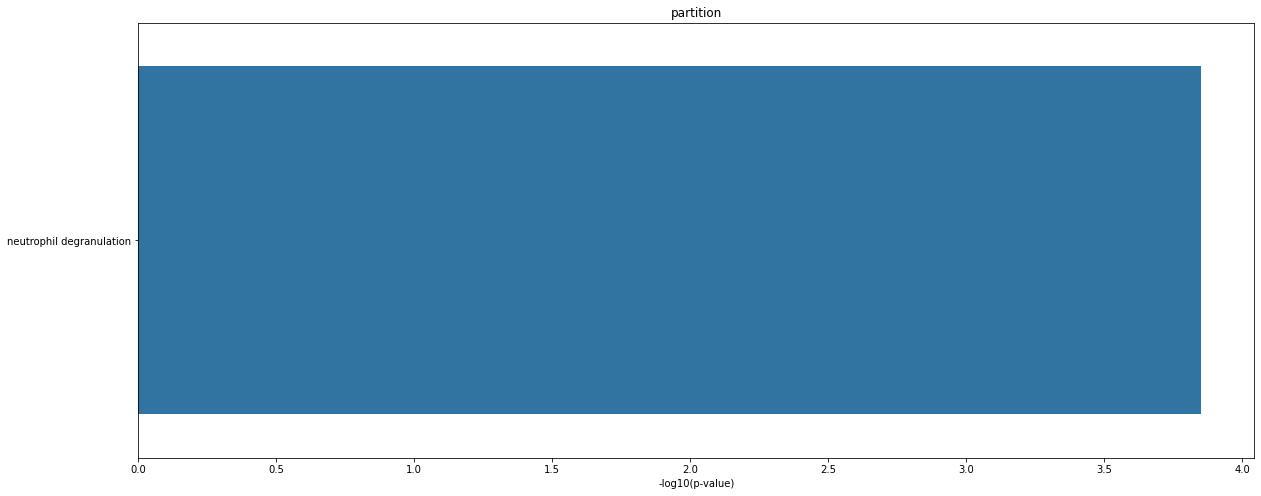

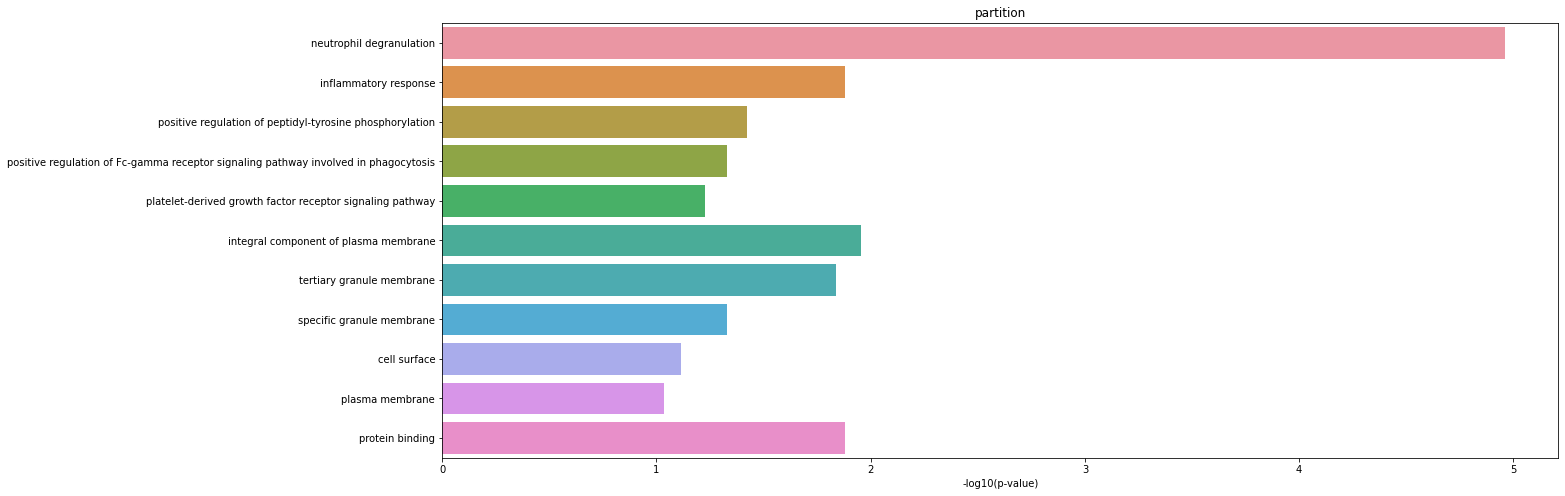

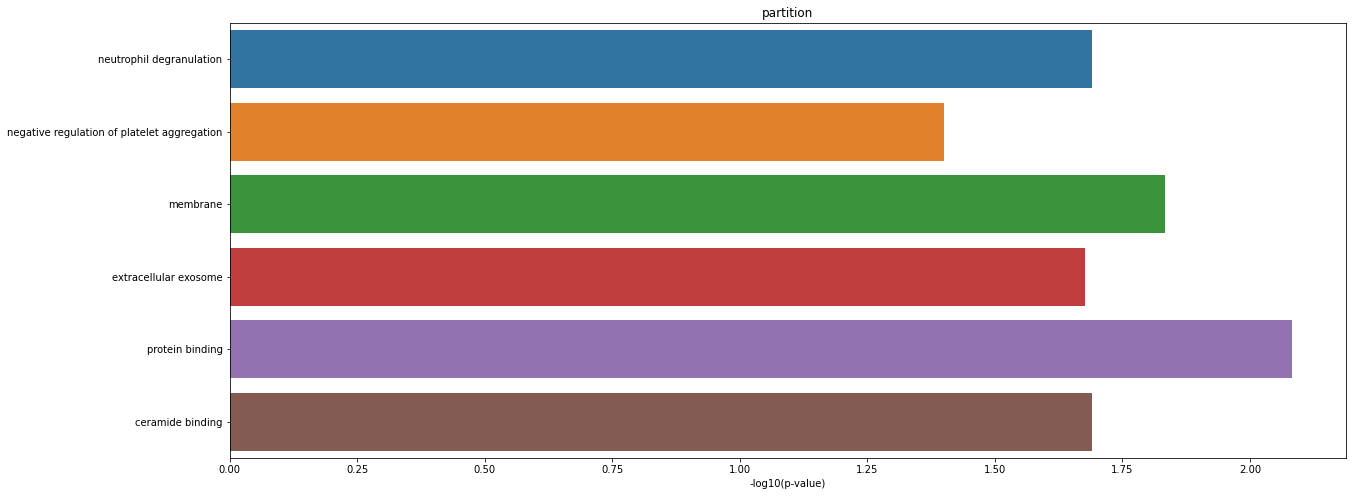

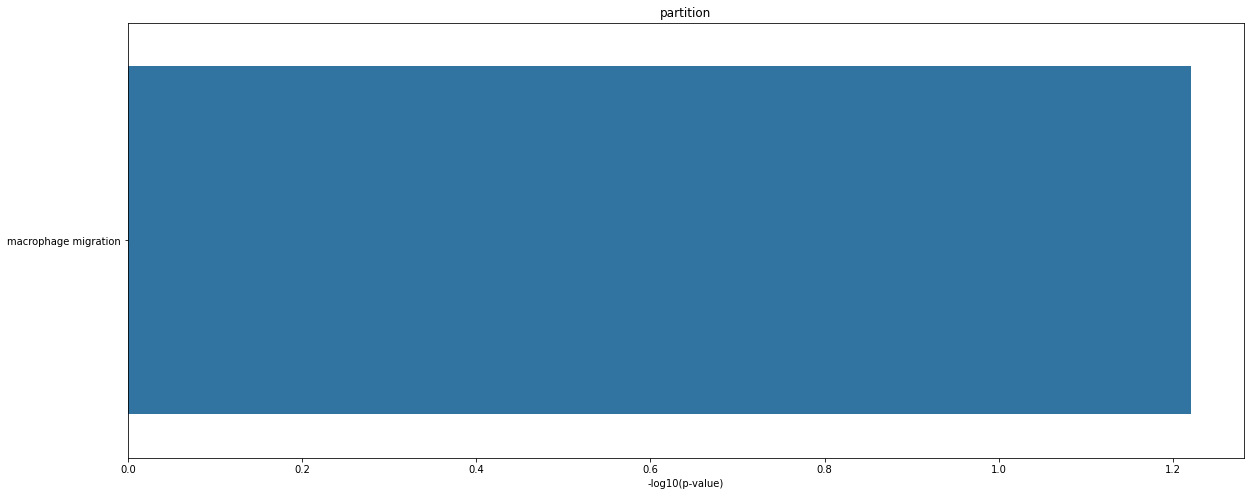

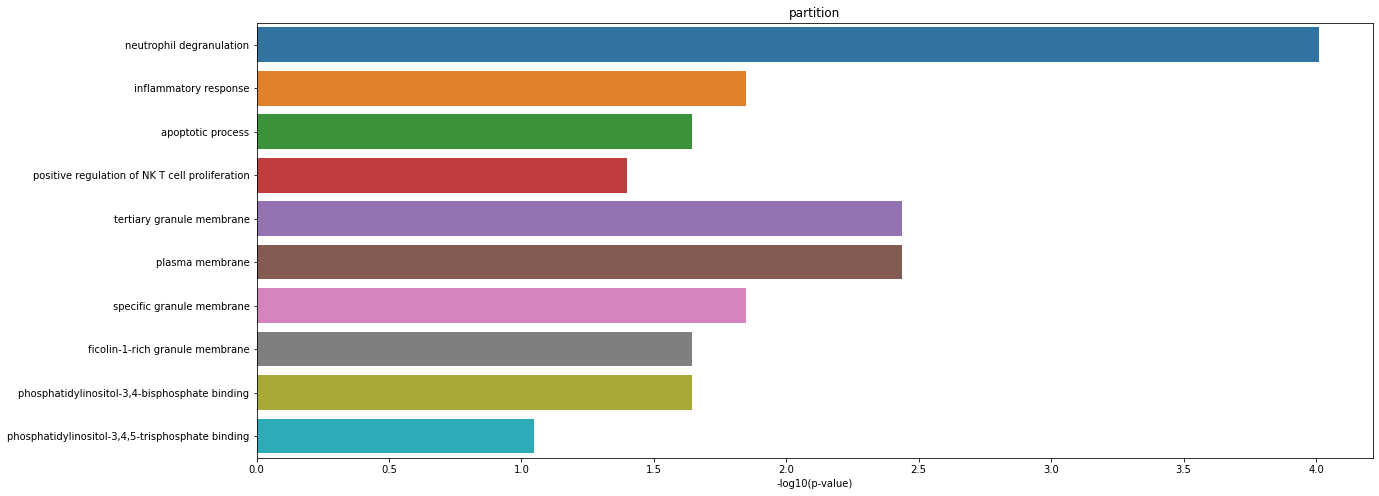

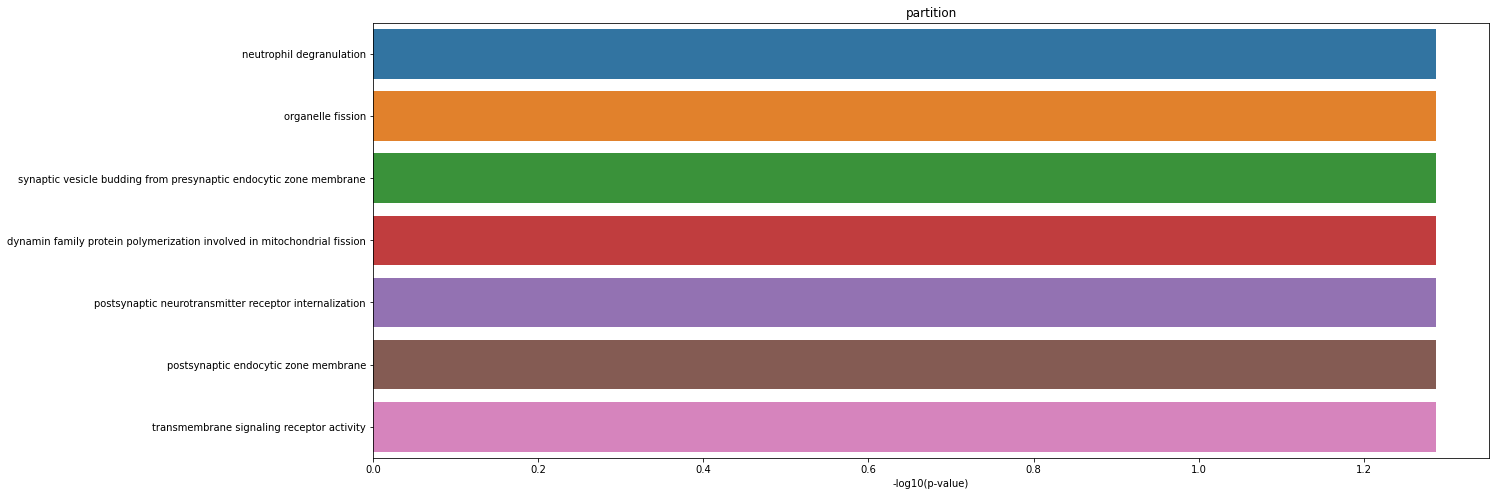

In [157]:
# [print(len(p)) for p in partition ]

for i in range(len(partition)):
    p = partition[i]
    partition_plot_and_analysis(i,p)